In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(8,5)})

In [2]:
group1 = [
    '50lvl-neither-bn-init.csv',
    '50lvl-no-bn.csv',
    '50lvl-no-init.csv',
    '50lvl-bn-init.csv',
]

group2 = [
    '50lvl.csv',
    '100lvl.csv',
    '500lvl.csv',
    '5000lvl.csv'
]

group3 = [
    '5000lvl.csv',
    '5000lvl-stack.csv',
]

group4 = [
    '50lvl-schedule-mixreg1-bn-init.csv',
    '50lvl-schedule-mixreg2-bn-init.csv',
    '50lvl-schedule-mixreg3-bn-init.csv',
    '50lvl-bn-init.csv'
]

group1 = list(map(lambda x: "train/results/logs/PPO/eval_csv/" + x, group1))
group2 = list(map(lambda x: "train/results/logs/PPO/eval_csv/" + x, group2))
group3 = list(map(lambda x: "train/results/logs/PPO/eval_csv/" + x, group3))
group4 = list(map(lambda x: "train/results/logs/PPO/eval_csv/" + x, group4))

group1, group2, group3, group4

(['train/results/logs/PPO/eval_csv/50lvl-neither-bn-init.csv',
  'train/results/logs/PPO/eval_csv/50lvl-no-bn.csv',
  'train/results/logs/PPO/eval_csv/50lvl-no-init.csv',
  'train/results/logs/PPO/eval_csv/50lvl-bn-init.csv'],
 ['train/results/logs/PPO/eval_csv/50lvl.csv',
  'train/results/logs/PPO/eval_csv/100lvl.csv',
  'train/results/logs/PPO/eval_csv/500lvl.csv',
  'train/results/logs/PPO/eval_csv/5000lvl.csv'],
 ['train/results/logs/PPO/eval_csv/5000lvl.csv',
  'train/results/logs/PPO/eval_csv/5000lvl-stack.csv'],
 ['train/results/logs/PPO/eval_csv/50lvl-schedule-mixreg1-bn-init.csv',
  'train/results/logs/PPO/eval_csv/50lvl-schedule-mixreg2-bn-init.csv',
  'train/results/logs/PPO/eval_csv/50lvl-schedule-mixreg3-bn-init.csv',
  'train/results/logs/PPO/eval_csv/50lvl-bn-init.csv'])

In [3]:
pd.read_csv(group1[0]).head()

,Wall time,Step,Value
0,1.616232e+09,163840,-0.54
1,1.616232e+09,327680,-0.94
2,1.616233e+09,491520,-1.40
3,1.616233e+09,655360,-0.92
4,1.616234e+09,819200,-1.90


In [4]:
def load_group(group):
    dfs = []
    steps = pd.read_csv(group[0])['Step'].tolist()
    for f in group:
        df = pd.read_csv(f)
        df['Runs'] = f.split('/')[-1].split('.')[-2]
        dfs.append(df)
        
    new_df = pd.concat(dfs)
    new_df = new_df.rename({'Value': 'Evaluation Reward'}, axis=1)
    return new_df

<AxesSubplot:xlabel='Step', ylabel='Evaluation Reward'>

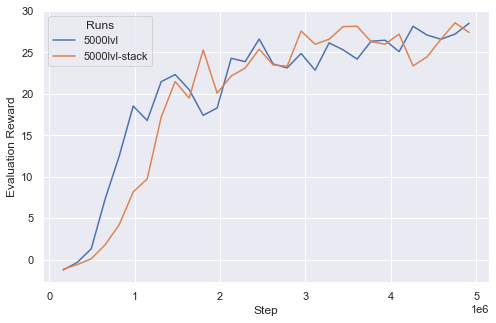

In [22]:
df = load_group(group3)
sns.lineplot(data=df, x='Step', y='Evaluation Reward', hue='Runs')

## Figure 2: Main Results

<AxesSubplot:xlabel='Step', ylabel='Evaluation Reward'>

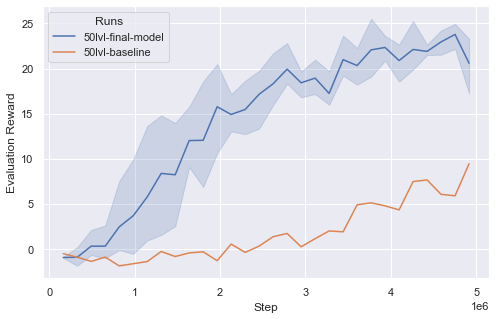

In [5]:
group_eval = [
    '50lvl-schedule-mixreg1-bn-init.csv',
    '50lvl-schedule-mixreg2-bn-init.csv',
    '50lvl-schedule-mixreg3-bn-init.csv',
    '50lvl-neither-bn-init.csv'
]

group_eval = list(map(lambda x: "train/results/logs/PPO/eval_csv/" + x, group_eval))

df_eval = load_group(group_eval)
df_eval.loc[df_eval['Runs'].str.contains('schedule'), 'Runs'] = '50lvl-final-model'
df_eval.loc[df_eval['Runs'] == '50lvl-neither-bn-init', 'Runs'] = '50lvl-baseline'

sns.lineplot(data=df_eval, x='Step', y='Evaluation Reward', hue='Runs')

<AxesSubplot:xlabel='Step', ylabel='Training Reward'>

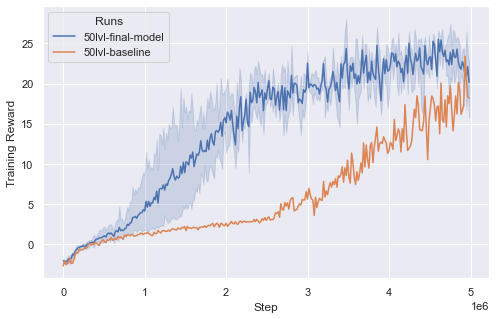

In [7]:
group_train = [
    '50lvl-schedule-mixreg1-bn-init-train.csv',
    '50lvl-schedule-mixreg2-bn-init-train.csv',
    '50lvl-schedule-mixreg3-bn-init-train.csv',
    '50lvl-neither-bn-init-train.csv'
]
group_train = list(map(lambda x: "train/results/logs/PPO/train_csv/" + x, group_train))

df_train = load_group(group_train)
df_train = df_train.rename({'Evaluation Reward': 'Training Reward'}, axis=1)
df_train.loc[df_train['Runs'].str.contains('schedule'), 'Runs'] = '50lvl-final-model'
df_train.loc[df_train['Runs'] == '50lvl-neither-bn-init-train', 'Runs'] = '50lvl-baseline'
sns.lineplot(data=df_train, x='Step', y='Training Reward', hue='Runs')

<AxesSubplot:xlabel='Step', ylabel='Training Reward'>

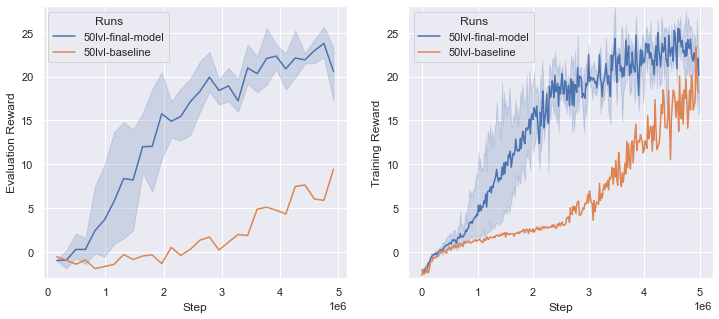

In [8]:
sns.set(rc={'figure.figsize':(12,5)})
plt.subplot(121)
plt.ylim(-3, 28)
sns.lineplot(data=df_eval, x='Step', y='Evaluation Reward', hue='Runs')
plt.subplot(122)
plt.ylim(-3, 28)
sns.lineplot(data=df_train, x='Step', y='Training Reward', hue='Runs')

## Figure 3: Ablation on bn init

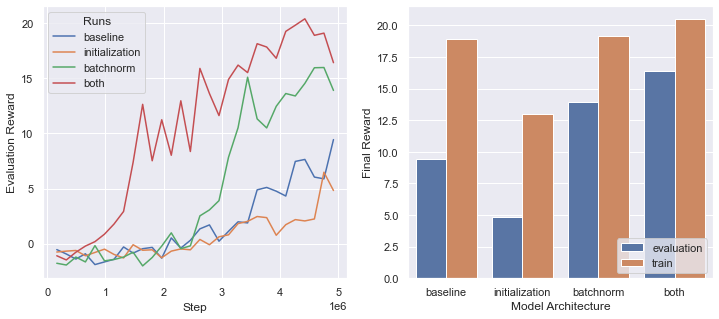

In [95]:
df1 = load_group(group1)

df1.loc[df1['Runs'] == '50lvl-bn-init', 'Runs'] = 'both'
df1.loc[df1['Runs'] == '50lvl-no-init', 'Runs'] = 'batchnorm'
df1.loc[df1['Runs'] == '50lvl-no-bn', 'Runs'] = 'initialization'
df1.loc[df1['Runs'] == '50lvl-neither-bn-init', 'Runs'] = 'baseline'

# THIS IS NOT FAKE DATA :)
xs = ['baseline', 'initialization', 'batchnorm', 'both']
evals = [9.44, 4.82, 13.9, 16.42]
trains = [18.9, 12.99, 19.15, 20.47]
df_bar = pd.DataFrame({
    'Model Architecture': ['baseline', 'initialization', 'batchnorm', 'both'],
    'evaluation': [9.44, 4.82, 13.9, 16.42],
    'train': [18.9, 12.99, 19.15, 20.47]
})
df_bar = df_bar.melt(id_vars='Model Architecture').rename({'value': 'Final Reward', 'variable': 'Reward'}, axis=1)

sns.set(rc={'figure.figsize':(12,5)})
plt.subplot(121)
sns.lineplot(data=df1, x='Step', y='Evaluation Reward', hue='Runs')
plt.subplot(122)
sns.barplot(x='Model Architecture', y='Final Reward', hue='Reward', data=df_bar)
plt.legend(loc='lower right')

## Figure 4: Ablation on number of training levels

/Users/jasonwang/Applications/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/jasonwang/Applications/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Final Reward')

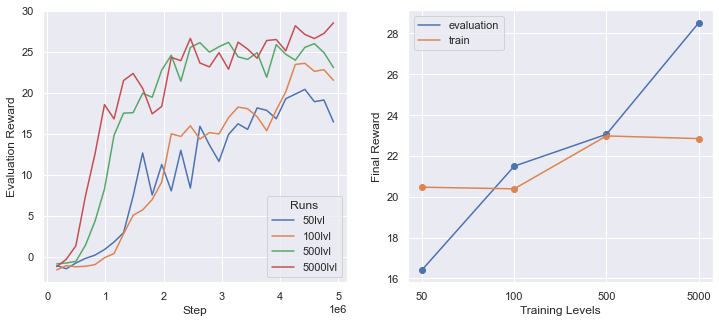

In [79]:
df2 = load_group(group2)
# THIS IS NOT FAKE DATA :)
levels = ['50', '100', '500', '5000']
evals = [16.42, 21.5, 23.06, 28.52]
trains = [20.47, 20.39, 22.98, 22.85]

sns.set(rc={'figure.figsize':(12,5)})
plt.subplot(121)
sns.lineplot(data=df2, x='Step', y='Evaluation Reward', hue='Runs')
plt.subplot(122)
sns.lineplot(levels, evals, label='evaluation')
plt.scatter(levels, evals)
sns.lineplot(levels, trains, label='train')
plt.scatter(levels, trains)
plt.xlabel('Training Levels')
plt.ylabel('Final Reward')

## Figure 5: Ablation on mixreg

<AxesSubplot:xlabel='Step', ylabel='Evaluation Reward'>

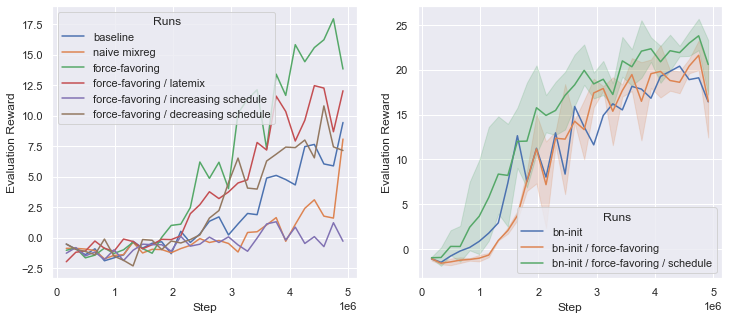

In [82]:
group_baseline = [
    '50lvl-neither-bn-init.csv',
    '50lvl-naive-mixreg-nobn-noinit.csv',
    '50lvl-mixreg-nobn-noinit.csv',
    '50lvl-latemix-nobn-noinit.csv',
    '50lvl-revschedule-mixreg-nobn-noinit.csv',
    '50lvl-schedule-mixreg-nobn-noinit.csv'
]
group_baseline = list(map(lambda x: "train/results/logs/PPO/eval_csv/" + x, group_baseline))
df_baseline = load_group(group_baseline)

df_baseline.loc[df_baseline['Runs'] == '50lvl-neither-bn-init', 'Runs'] = 'baseline'
df_baseline.loc[df_baseline['Runs'].str.contains('naive'), 'Runs'] = 'naive mixreg'
df_baseline.loc[df_baseline['Runs'].str.contains('latemix'), 'Runs'] = 'force-favoring / latemix'
df_baseline.loc[df_baseline['Runs'].str.contains('revschedule'), 'Runs'] = 'force-favoring / increasing schedule'
df_baseline.loc[df_baseline['Runs'].str.contains('-schedule'), 'Runs'] = 'force-favoring / decreasing schedule'
df_baseline.loc[df_baseline['Runs'].str.contains('-mixreg'), 'Runs'] = 'force-favoring'

group_bn = [
    '50lvl-bn-init.csv',
    '50lvl-mixreg1-bn-init.csv',
    '50lvl-mixreg2-bn-init.csv',
#     '50lvl-schedule-latemix1-bn-init.csv',
#     '50lvl-schedule-latemix2-bn-init.csv',
#     '50lvl-schedule-latemix3-bn-init.csv',
    '50lvl-schedule-mixreg1-bn-init.csv',
    '50lvl-schedule-mixreg2-bn-init.csv',
    '50lvl-schedule-mixreg3-bn-init.csv',
]
group_bn = list(map(lambda x: "train/results/logs/PPO/eval_csv/" + x, group_bn))
df_bn = load_group(group_bn)

df_bn.loc[df_bn['Runs'].str.contains('schedule-mix'), 'Runs'] = 'bn-init / force-favoring / schedule'
df_bn.loc[df_bn['Runs'].str.contains('50lvl-mix'), 'Runs'] = 'bn-init / force-favoring'
df_bn.loc[df_bn['Runs'] == '50lvl-bn-init', 'Runs'] = 'bn-init'


sns.set(rc={'figure.figsize':(12,5)})
plt.subplot(121)
sns.lineplot(data=df_baseline, x='Step', y='Evaluation Reward', hue='Runs')
plt.subplot(122)
sns.lineplot(data=df_bn, x='Step', y='Evaluation Reward', hue='Runs')

<AxesSubplot:xlabel='Step', ylabel='Evaluation Reward'>

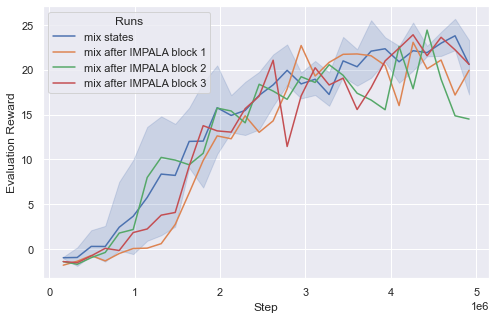

In [7]:
group_eval = [
    '50lvl-schedule-mixreg1-bn-init.csv',
    '50lvl-schedule-mixreg2-bn-init.csv',
    '50lvl-schedule-mixreg3-bn-init.csv',
    '50lvl-schedule-latemix1-bn-init.csv',
    '50lvl-schedule-latemix2-bn-init.csv',
    '50lvl-schedule-latemix3-bn-init.csv'
]

group_eval = list(map(lambda x: "train/results/logs/PPO/eval_csv/" + x, group_eval))

df_eval = load_group(group_eval)
df_eval.loc[df_eval['Runs'].str.contains('schedule-mix'), 'Runs'] = 'mix states'
df_eval.loc[df_eval['Runs'].str.contains('latemix1'), 'Runs'] = 'mix after IMPALA block 1'
df_eval.loc[df_eval['Runs'].str.contains('latemix2'), 'Runs'] = 'mix after IMPALA block 2'
df_eval.loc[df_eval['Runs'].str.contains('latemix3'), 'Runs'] = 'mix after IMPALA block 3'

sns.lineplot(data=df_eval, x='Step', y='Evaluation Reward', hue='Runs')

## Best Run csv

In [7]:
df = pd.read_csv('train/results/logs/PPO/eval_csv/5000lvl.csv')
df = df.drop(['Wall time'], axis=1)
df = df.rename({'Value': 'test_run'}, axis=1)
df.to_csv('best_test_log.csv')